<a href="https://colab.research.google.com/github/F1ameX/TUSUR_ML/blob/main/TUSUR_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Продвинутый вариант выполнения задания

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
source_df = pd.read_csv('/content/drive/MyDrive/src_2hw/orders.csv')
processed_df = pd.read_csv('/content/drive/MyDrive/src_3hw/data.csv')
orders_df = pd.DataFrame()
products_df = pd.DataFrame()
result_df = pd.DataFrame()

In [3]:
orders_df['order_id'] = processed_df['order_id']
orders_df['order_price'] = processed_df['order_price']
orders_df

,order_id,order_price
0,20562761,30.49
1,20562753,51.94
2,20562723,24.68
3,20562673,24.68
4,20562665,14.02
...,...,...
7820,20535845,88.44
7821,20535841,21.05
7822,20535837,102.11
7823,20535835,43.43


In [4]:
products_map = pd.read_csv('/content/drive/MyDrive/src_2hw/products.csv').set_index('product_id')['product_name'].to_dict()
products_df['order_id'] = source_df['order_id']
products_df['product_name'] = source_df['product_id'].map(products_map)
products_df

,order_id,product_name
0,20562761,Nachos
1,20562761,Curry
2,20562753,Soup
3,20562753,Salad
4,20562723,Sushi
...,...,...
19995,20535837,Fruit Salad
19996,20535835,Steak
19997,20535835,Steak
19998,20535835,Mozzarella Sticks


In [5]:
grouped_products = products_df.groupby('order_id')['product_name'].apply(lambda x: ', '.join(x)).reset_index(name='products')
products_df = products_df.merge(grouped_products, on='order_id')
products_df = products_df.drop('product_name', axis=1)
products_df

,order_id,products
0,20562761,"Nachos, Curry"
1,20562761,"Nachos, Curry"
2,20562753,"Soup, Salad"
3,20562753,"Soup, Salad"
4,20562723,Sushi
...,...,...
19995,20535837,"Nachos, Dumplings, Potato, Cereal, Fruit Salad"
19996,20535835,"Steak, Steak, Mozzarella Sticks"
19997,20535835,"Steak, Steak, Mozzarella Sticks"
19998,20535835,"Steak, Steak, Mozzarella Sticks"


In [6]:
result_df = products_df.merge(orders_df, on='order_id')
result_df

,order_id,products,order_price
0,20562761,"Nachos, Curry",30.49
1,20562761,"Nachos, Curry",30.49
2,20562753,"Soup, Salad",51.94
3,20562753,"Soup, Salad",51.94
4,20562723,Sushi,24.68
...,...,...,...
19995,20535837,"Nachos, Dumplings, Potato, Cereal, Fruit Salad",102.11
19996,20535835,"Steak, Steak, Mozzarella Sticks",43.43
19997,20535835,"Steak, Steak, Mozzarella Sticks",43.43
19998,20535835,"Steak, Steak, Mozzarella Sticks",43.43


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
text_matrix = vectorizer.fit_transform(result_df['products'])
terms = vectorizer.get_feature_names_out()
terms_df = pd.DataFrame(text_matrix.toarray(), index = result_df['order_price'], columns=terms)
terms_df

,avocado,bagel,banh,bbq,benedict,biscuit,brownie,burger,burrito,carrot,...,sticks,sushi,tacos,tempura,toast,tortilla,waffle,wings,wrap,yogurt
order_price,,,,,,,,,,,,,,,,,,,,,
30.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.403272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.403272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
!pip install umap-learn -q
from umap import UMAP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00


In [9]:
reducer = UMAP(n_neighbors=15, n_components=3, metric='cosine')
terms_df_reduced = reducer.fit_transform(terms_df)
reduced_df = pd.DataFrame(terms_df_reduced)
reduced_df['order_price'] = terms_df.index
reduced_df

,0,1,2,order_price
0,8.196040,0.752046,2.597949,30.49
1,8.196102,0.751990,2.597953,30.49
2,-1.714327,11.795375,8.481444,51.94
3,-1.714315,11.795402,8.481474,51.94
4,-3.356375,17.548311,0.595907,24.68
...,...,...,...,...
19995,-9.722272,0.605266,11.668258,102.11
19996,6.111720,-1.624503,8.045266,43.43
19997,6.112329,-1.625086,8.043344,43.43
19998,6.112055,-1.624963,8.043718,43.43


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

def plot_silhouette(values):
  silhouette_scores = []
  for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):
      kmeans = KMeans(n_clusters=n_clusters, random_state=42)
      cluster_labels = kmeans.fit_predict(values)
      silhouette_avg = silhouette_score(values, cluster_labels)
      silhouette_scores.append(silhouette_avg)

  plt.figure(figsize=(12, 8))
  plt.plot(range(MIN_CLUSTERS, MAX_CLUSTERS + 1), silhouette_scores, marker='o')
  plt.xlabel('Количество кластеров')
  plt.ylabel('Индекс силуэта')
  plt.title('Метод локтя для определения оптимального количества кластеров')
  plt.show()

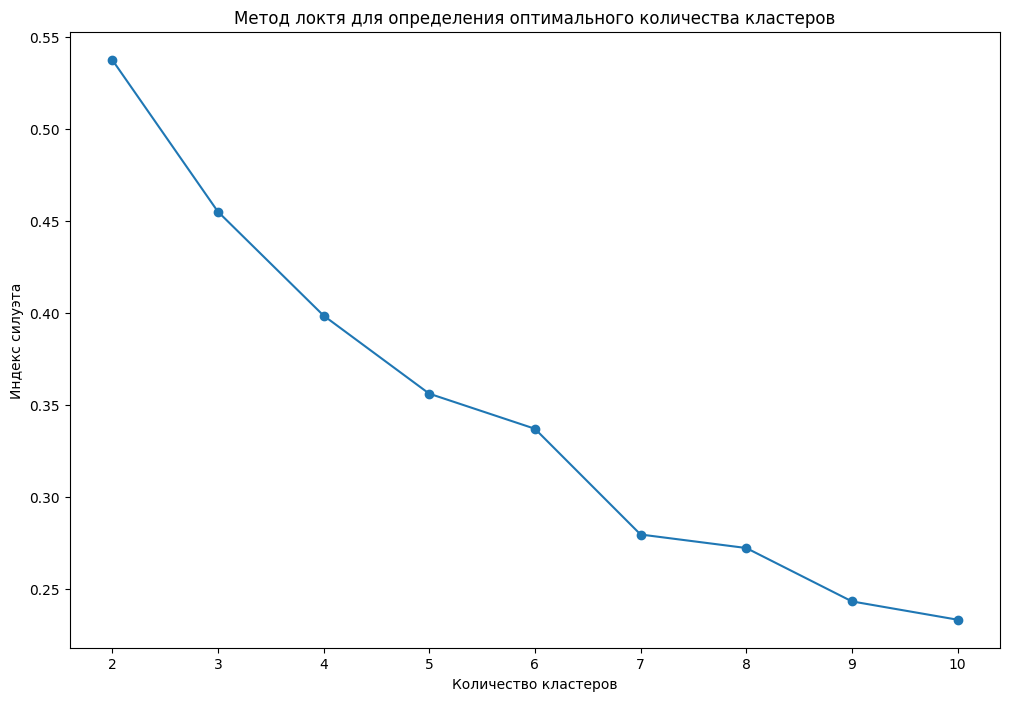

In [18]:
reduced_df.columns = reduced_df.columns.astype(str)
plot_silhouette(reduced_df)

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(2)
predictions = kmeans.fit_predict(reduced_df)

In [29]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score


def inner_metrics(values, predicted_labels):
  silhouette = silhouette_score(values, predicted_labels)
  db = davies_bouldin_score(values, predicted_labels)
  sh = calinski_harabasz_score(values, predicted_labels)
  print(f'Оценка силуэта: {silhouette},\nИндекс Дэвиса-Болдина: {db},\nИндекс Калинского-Харабаза: {sh}')

In [30]:
inner_metrics(reduced_df, predictions)

Оценка силуэта: 0.537809246866531,
Индекс Дэвиса-Болдина: 0.6856730698503506,
Индекс Калинского-Харабаза: 28297.07472975089


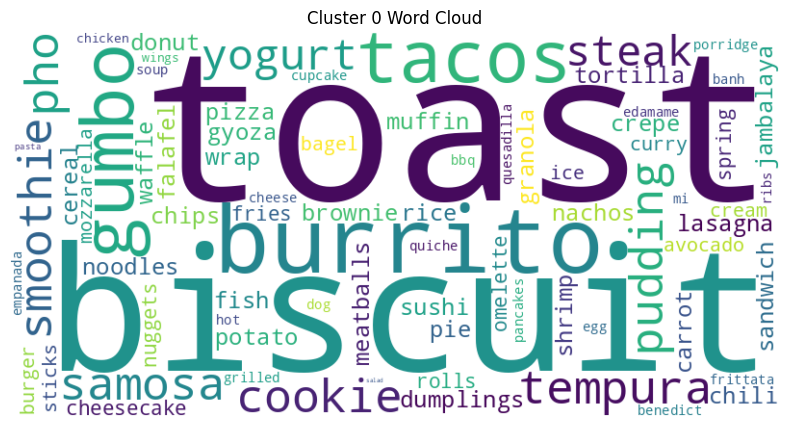

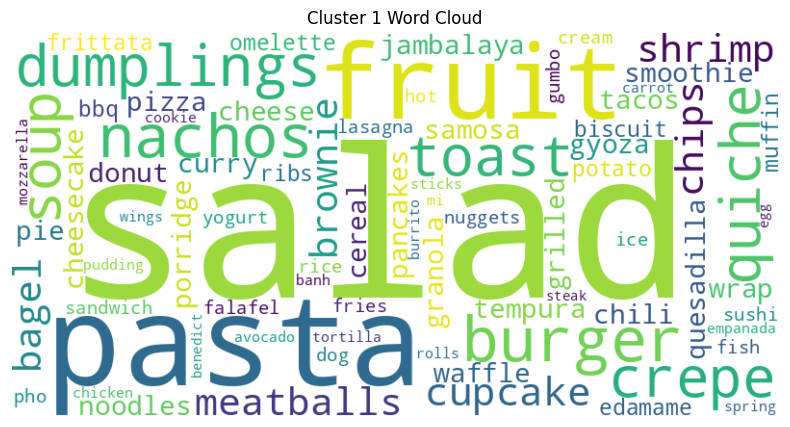

In [36]:
import numpy as np
from wordcloud import WordCloud


labels = kmeans.fit_predict(terms_df)
result_df['cluster'] = labels
words = terms_df.columns

# Проходим по каждому кластеру
for cluster in np.unique(labels):
    # Извлекаем индексы документов, принадлежащих текущему кластеру
    cluster_docs_indices = np.where(labels == cluster)[0]
    tfidf_cluster = terms_df.iloc[cluster_docs_indices].sum(axis=0)


    # Преобразуем в словарь: ключи - слова, значения - веса
    tfidf_cluster_dict = {words[i]: tfidf_cluster[i] for i in range(tfidf_cluster.shape[0])}


    # Создаем WordCloud для текущего кластера
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_cluster_dict)

    # Отображаем WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster} Word Cloud')
    plt.show()